## 模型结构
$$
\hat{y} = w_1 x_1 + w_2 x_2+...+b
$$
把所有的特征收集到一个向量$x\in R^n$,所有的权重放到一个向量$w \in R^{n}$ :,

$$
\hat{y} = w^T x + b
$$
$x$表示一个训练样本的所有特征，用矩阵$X \in R^{m \times n}$表示n个训练样本 , $Y \in R^{n \times 1}$：

$$
Y = Xw + b
$$

将$x^*=[x^T,1]^T,x\in R^n ,w\in R^{n+1}=[w^T,b]$, 

### 准备实验数据

In [198]:
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [199]:

def generate_date(w, num_example):
    X=np.linspace(0,1, num_example)
    X=np.c_[X,np.ones(num_example)]
    #X = 2 * np.random.rand(num_example, len(w)-1)
    #X = np.c_[X , np.ones(num_example)]
    y = X.dot(w)
    y = y + np.random.normal(0,0.5,y.shape)
    return X,y
true_w = [3,2]
true_b = 2
X,y = generate_date(true_w,100)
X.shape,y.shape

((100, 2), (100,))

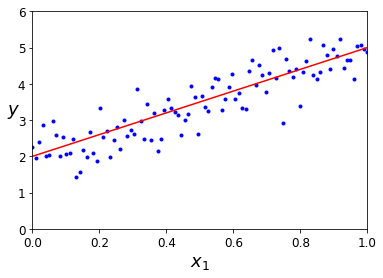

In [200]:
plt.plot(X[:,0:-1], y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X,3 * X + 2.0,'r')
plt.axis([0,1, 0, 6])
#save_fig("generated_data_plot")
plt.show()



### 模型求解
利用等式$y = 3x +2$ ，伪造了一部分数据，并给$x$加了噪声数据。线性回归在$x,y$的情况下，求出最优解$w^*$

首先我们构造损失函数$L(w)$
$$
L(w)=\|\mathbf{Y} - \mathbf{X}\mathbf{w}\|^2 = \sum_{i=1}^m(y_i-f(x_i))^2=\sum_{i=1}^m(y_i-w^Tx_i)^2=(Y-X)^T(Y-X)
$$

这里$m$表示样本量，本例中$m=100$, $X^*\in R^{m \times (n+1)},Y\in R^{m\times 1}$, 损失函数$L(w)$的本质是关于$w$的函数，通过求解最小的$L(w)$即可求出最优解$w^*$

$$
w^*=arg \min_{w}L(w)
$$

#### 方法一：直接求封闭式（解析解）

$$
L(w)=\sum_{i=1}^m(y_i-f(x_i))^2=\sum_{i=1}^m(y_i-w^Tx_i)^2=(Y-X w)^T(Y-X w) \\
= w^T X^T X w - 2w^T X^T Y + Y^T Y
$$
通过直接求导$\frac{dL}{dw}=0$，得到$w^*$，梯度推到如下：
$$
\frac{dL}{dw} = 2X^TXw - 2X^T Y = 0 \\
->X^T X w =X^TY 
$$
最终可得：
$$
w^* = (X^T X)^{-1} X^T Y
$$

实际情景中数据不一定能满足$X^T X$是满秩(比如$m<n，w$有无穷解)，这里需要伪逆的知识
![](https://gitee.com/wubmu/image/raw/master/img/v2-1cea344eb297384e70f407f2ae3a9c7e_720w.jpg)

伪逆求解方法：SVD分解，QR分解

#### 梯度下降求解
但对于数据量很大的情况，求闭式解的方式会让内存很吃力，我们可以通过随机梯度下降法（SGD）对$w$进行更新，首先随机初始化$w$，然后使用如下的迭代公式对$w$进行迭代更新：

$$w:=w-\eta\frac{dL}{dw}$$

### 代码实现

#### 闭式求解


In [201]:
w = np.linalg.pinv(X).dot(y)
w

array([3.06896634, 1.91359357])

#### 随机梯度下降求解

In [202]:
w = np.random.random(size=w.shape)
epoches = 1000
learning_rate = 0.001
losses = []

for _ in range(epoches):
    dw = 2 * X.T.dot(X.dot(w)-y)
    w = w - learning_rate * dw
    losses.append((X.dot(w) - y).T.dot(X.dot(w) - y))
w

array([3.06896448, 1.91359457])

Text(0, 0.5, 'loss')

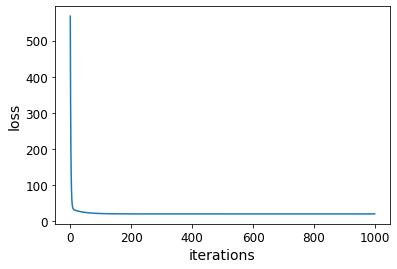

In [203]:
#loss变化
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('loss')

### 封装与测试

In [ ]:
class LinearRegression(object):
    def __init__